## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [2]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Random state seed
rseed = 42

## Load and explore data

In [4]:
# Import the dataset
df = pd.read_csv('Country-data.csv')

In [5]:
# Check the shape
print(df.shape)

(167, 10)


In [6]:
# Check datatypes & counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [7]:
# Get descriptive statistics
print(df.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [8]:
# Identify any missing data
print(df.isnull().sum(), end='\n\n')

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64



## Preprocessing and Feature Selection

In [9]:
# Drop any non-numeric features (columns)
df.head()
df = df.drop(["country"], axis=1)

<Axes: >

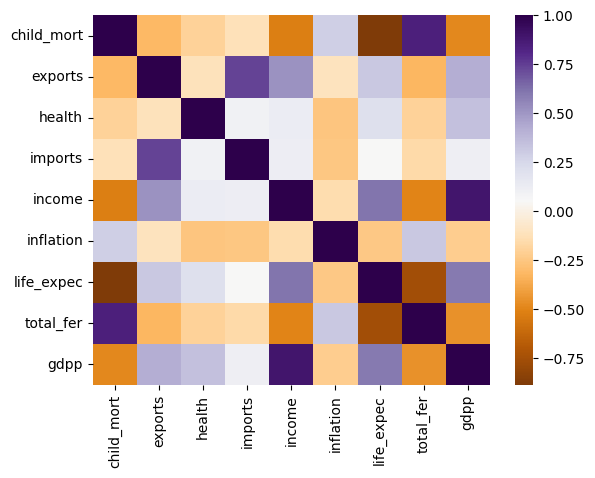

In [10]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
corr_matrix=df.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')

In [11]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


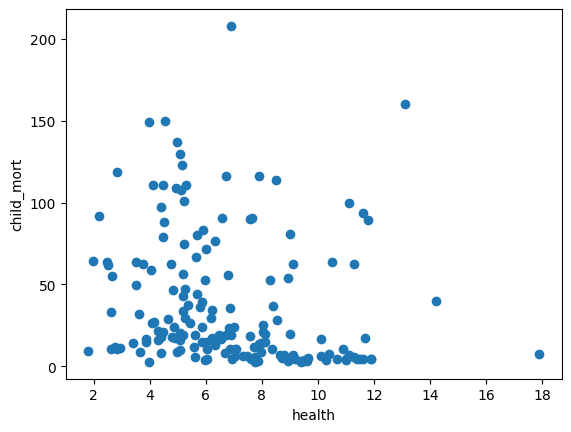

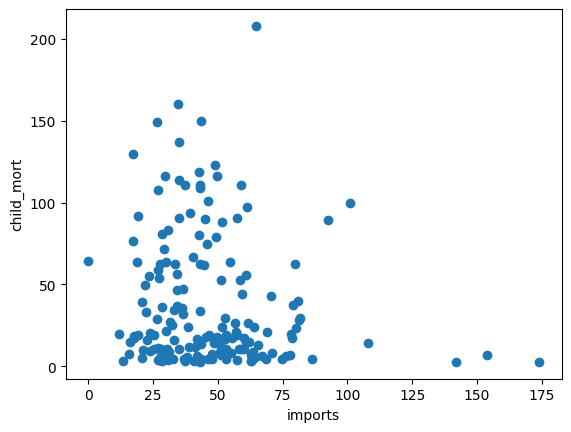

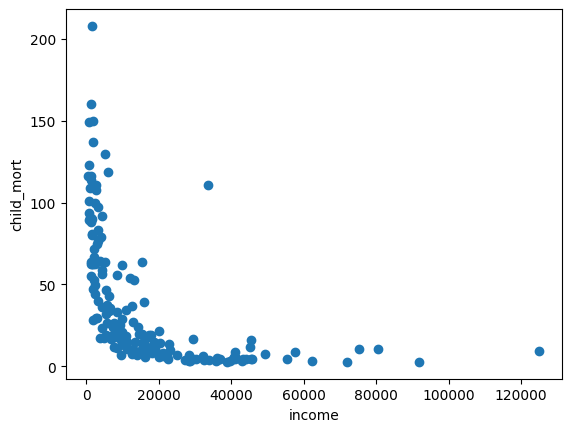

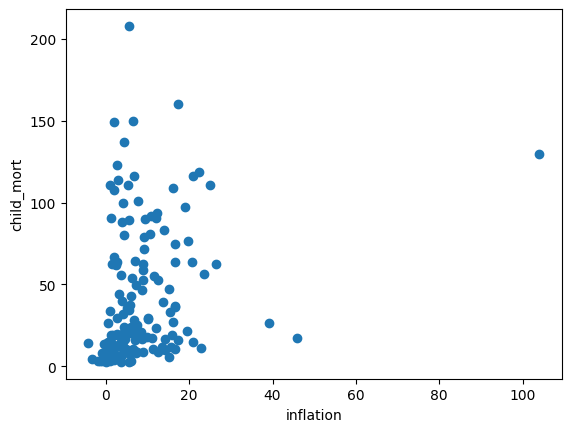

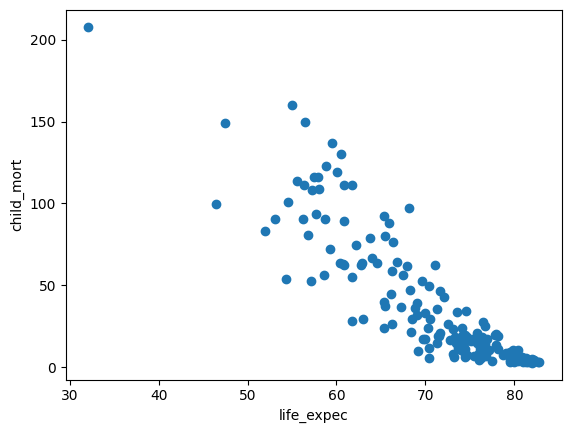

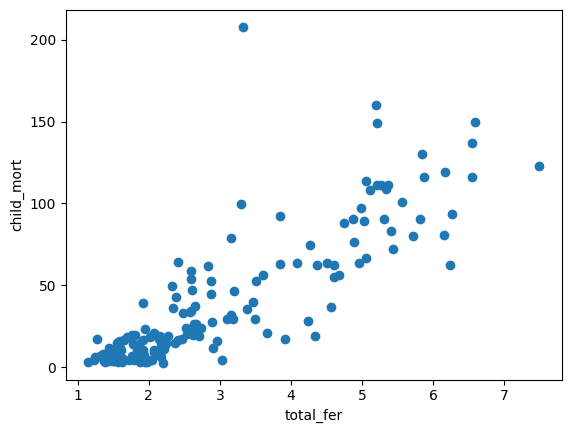

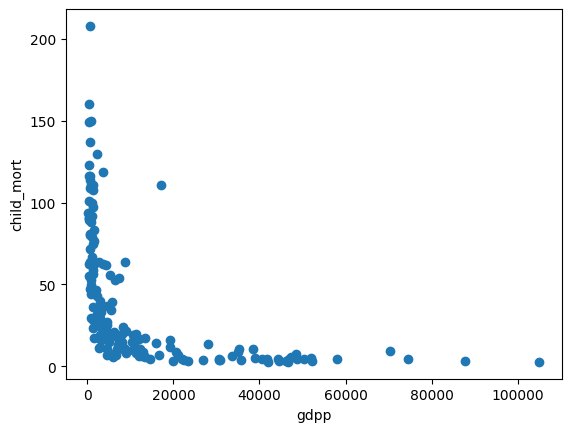

In [12]:
# Explore the continuous independent features against child_mort using scatter plots.
for f in df.columns[2:9]:
  plt.scatter(df[f], df['child_mort'])
  plt.xlabel(f)
  plt.ylabel('child_mort')
  plt.show()

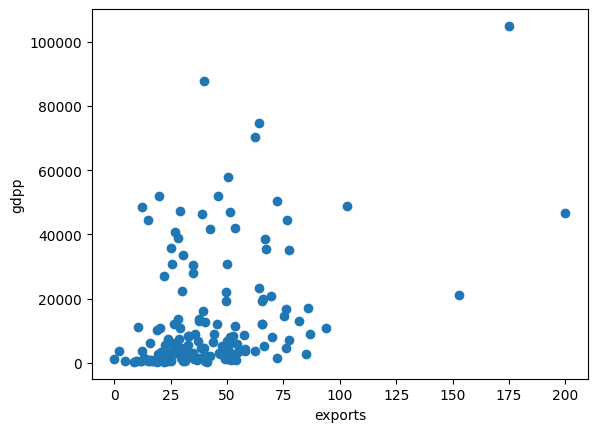

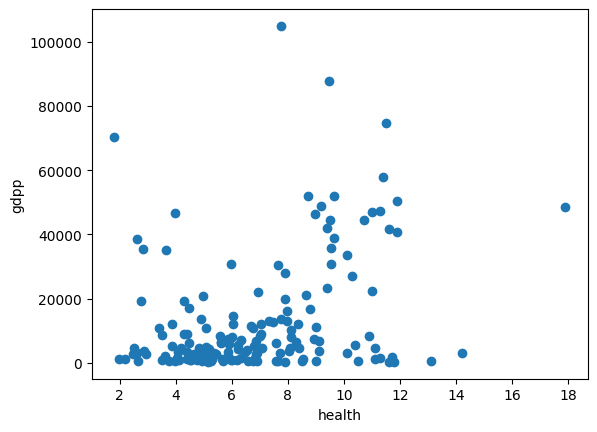

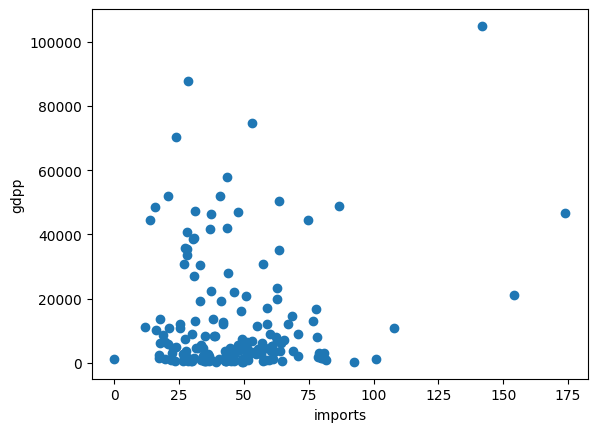

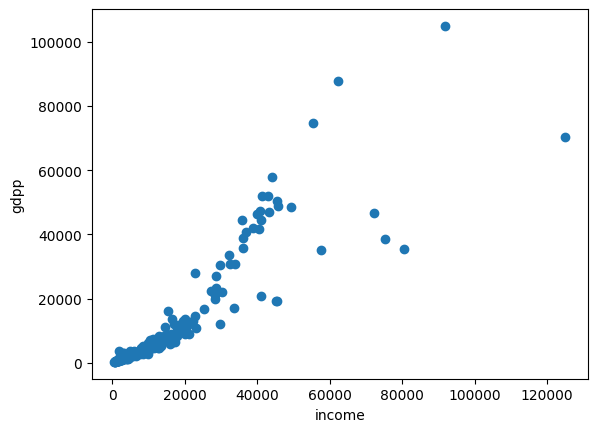

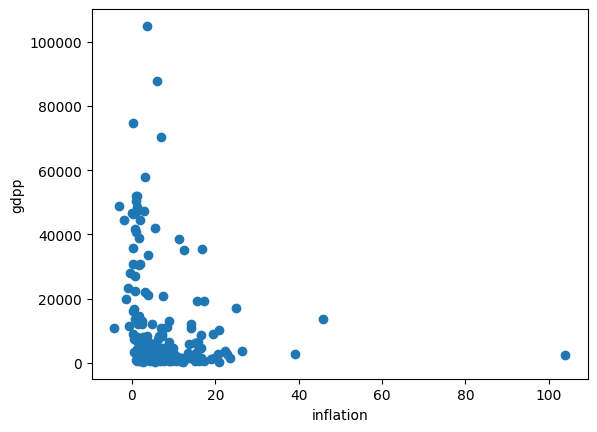

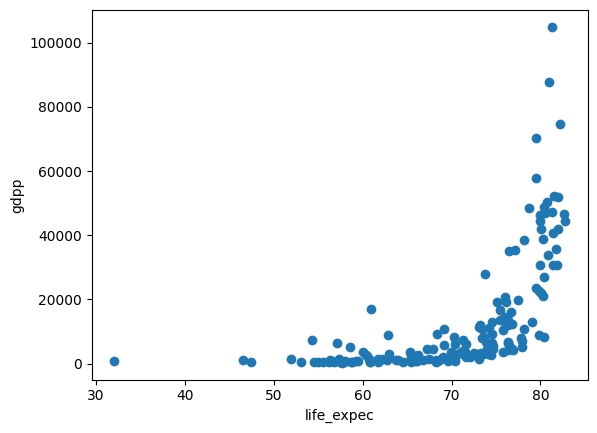

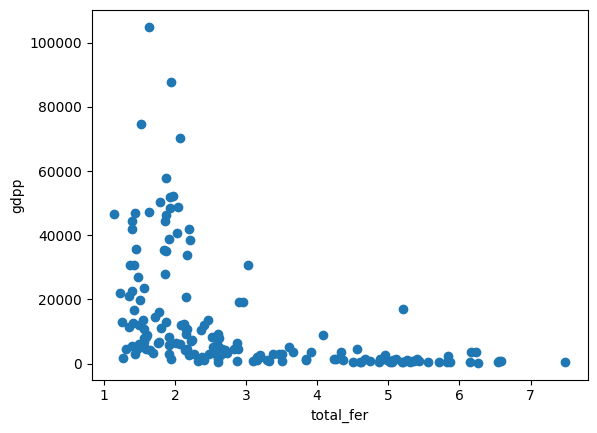

In [13]:
# Explore the continuous independent features against gdpp using scatter plots.
for f in df.columns[1:8]:
  plt.scatter(df[f], df['gdpp'])
  plt.xlabel(f)
  plt.ylabel('gdpp')
  plt.show()

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


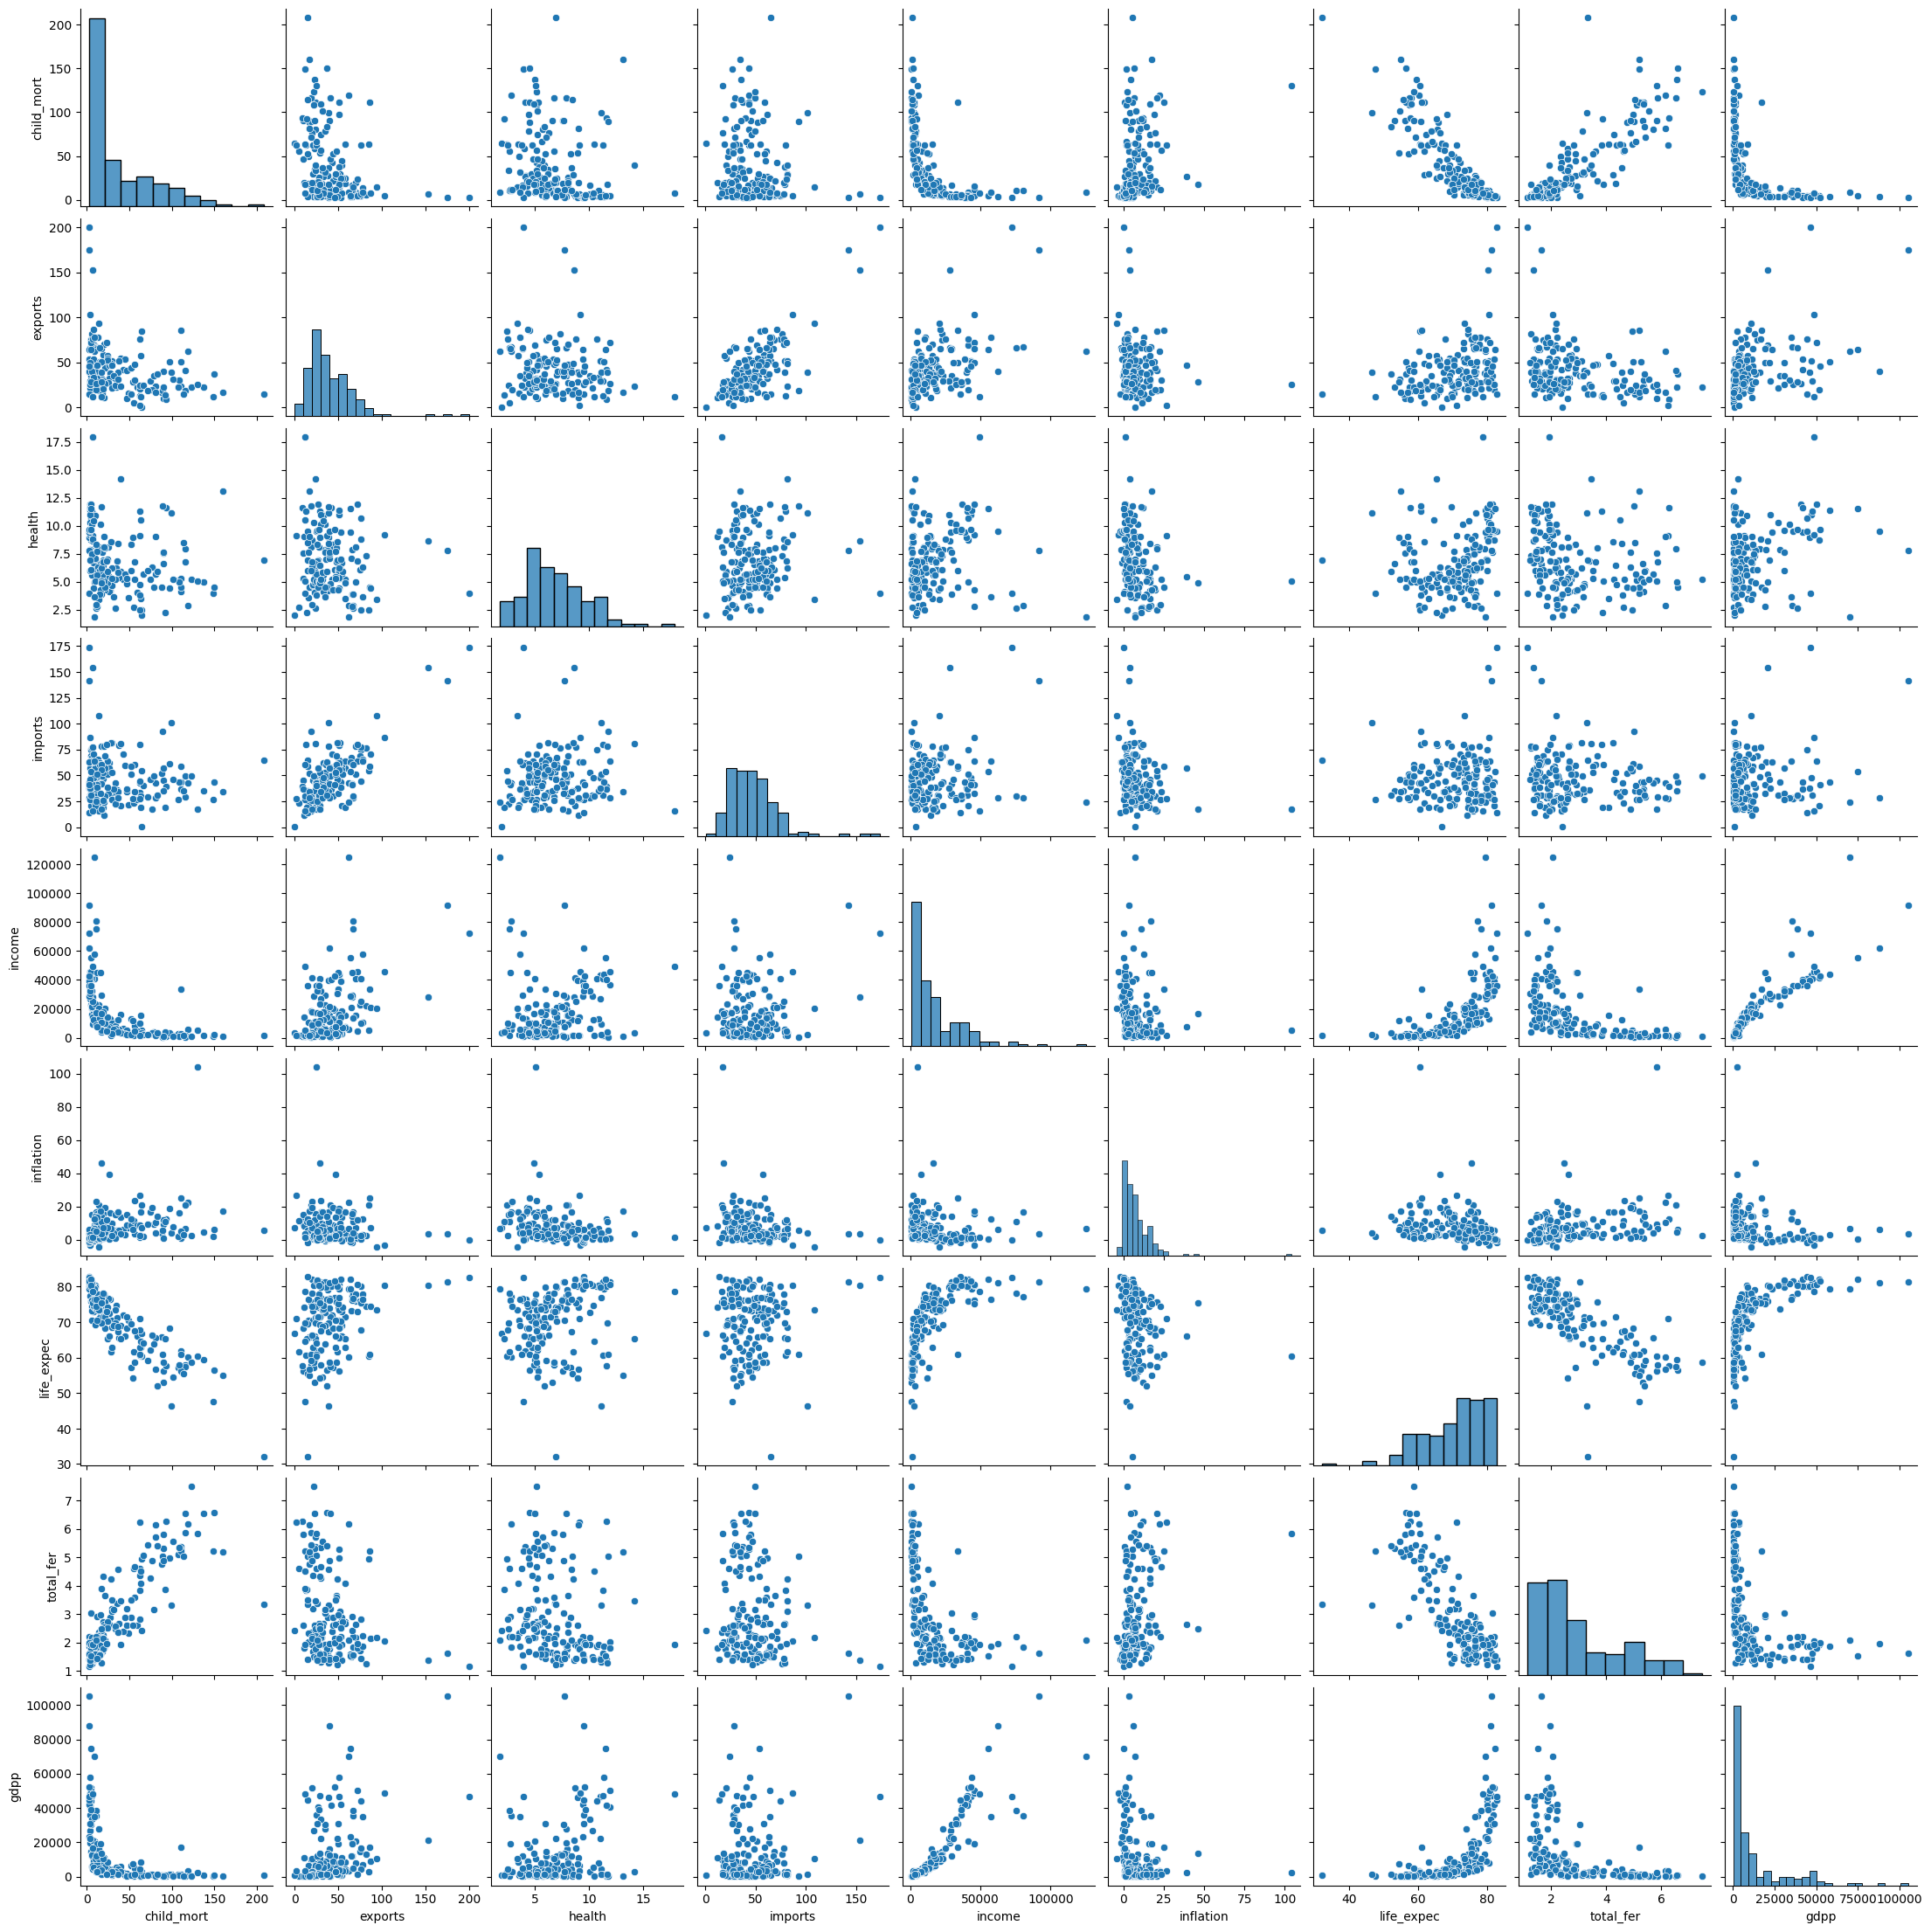

In [14]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(df)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [15]:
# define min max scaler
scaler = MinMaxScaler()

# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
gdpp_mort_df = df[["gdpp","child_mort"]]
df_scaled = scaler.fit_transform(gdpp_mort_df)

#df_scaled.head()
df_scaled

array([[3.07342821e-03, 4.26484907e-01],
       [3.68334145e-02, 6.81596884e-02],
       [4.03649935e-02, 1.20253165e-01],
       [3.14883219e-02, 5.66699124e-01],
       [1.14241808e-01, 3.74878286e-02],
       [9.61066728e-02, 5.79357352e-02],
       [2.85294314e-02, 7.54625122e-02],
       [4.93170690e-01, 1.07108082e-02],
       [4.45446649e-01, 8.27653359e-03],
       [5.35368286e-02, 1.78188900e-01],
       [2.65049776e-01, 5.45277507e-02],
       [1.95372677e-01, 2.92112950e-02],
       [5.03011387e-03, 2.27848101e-01],
       [1.50512079e-01, 5.64751704e-02],
       [5.53503422e-02, 1.41187926e-02],
       [4.21584629e-01, 9.25024343e-03],
       [3.92196165e-02, 7.88704966e-02],
       [5.03011387e-03, 5.27750730e-01],
       [1.86028310e-02, 1.95228822e-01],
       [1.66938694e-02, 2.14216164e-01],
       [4.17967147e-02, 2.09347614e-02],
       [5.84046808e-02, 2.42940604e-01],
       [1.04697000e-01, 8.37390458e-02],
       [3.34726875e-01, 3.84615385e-02],
       [6.308163

In [16]:
# define min max scaler
scaler = MinMaxScaler()

# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled_2"
gdpp_inflation_df = df[["gdpp", "inflation"]]
df_scaled_2= scaler.fit_transform(gdpp_inflation_df)

#df_scaled_2.head()
df_scaled_2

array([[3.07342821e-03, 1.26143610e-01],
       [3.68334145e-02, 8.03992237e-02],
       [4.03649935e-02, 1.87690602e-01],
       [3.14883219e-02, 2.45910729e-01],
       [1.14241808e-01, 5.22132890e-02],
       [9.61066728e-02, 2.32048794e-01],
       [2.85294314e-02, 1.10710655e-01],
       [4.93170690e-01, 4.96257278e-02],
       [4.45446649e-01, 4.69734775e-02],
       [5.35368286e-02, 1.66435634e-01],
       [2.65049776e-01, 3.52740043e-02],
       [1.95372677e-01, 1.07661029e-01],
       [5.03011387e-03, 1.04888642e-01],
       [1.50512079e-01, 4.18722854e-02],
       [5.53503422e-02, 1.78449312e-01],
       [4.21584629e-01, 5.62794566e-02],
       [3.92196165e-02, 4.94409019e-02],
       [5.03011387e-03, 4.70843730e-02],
       [1.86028310e-02, 9.42611589e-02],
       [1.66938694e-02, 1.20044358e-01],
       [4.17967147e-02, 5.18436374e-02],
       [5.84046808e-02, 1.21338139e-01],
       [1.04697000e-01, 1.16625081e-01],
       [3.34726875e-01, 1.93235376e-01],
       [6.308163

In [17]:
gdpp_child_mortality = pd.DataFrame(df_scaled,columns = ["child_mort", "gdpp"])
gdpp_child_mortality

,child_mort,gdpp
0,0.003073,0.426485
1,0.036833,0.068160
2,0.040365,0.120253
3,0.031488,0.566699
4,0.114242,0.037488
...,...,...
162,0.026143,0.129503
163,0.126650,0.070594
164,0.010299,0.100779
165,0.010299,0.261441


In [18]:
gdpp_inflation =  pd.DataFrame(df_scaled,columns = ["inflation", "gdpp"])
gdpp_inflation

,inflation,gdpp
0,0.003073,0.426485
1,0.036833,0.068160
2,0.040365,0.120253
3,0.031488,0.566699
4,0.114242,0.037488
...,...,...
162,0.026143,0.129503
163,0.126650,0.070594
164,0.010299,0.100779
165,0.010299,0.261441


## K-Means Clustering

### Selecting K

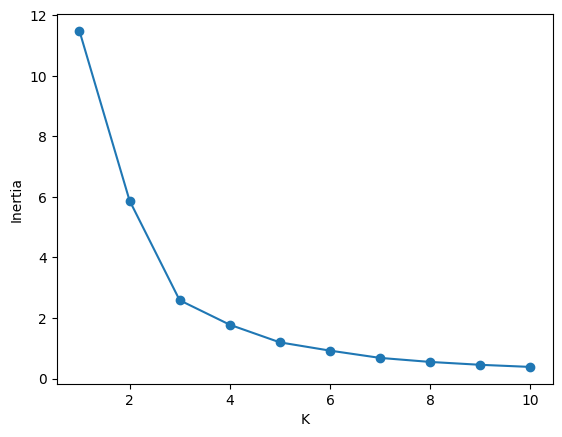

In [19]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curve using scaled dataset (gdpp vs child mortality)
elbow_Kmeans(df_scaled)



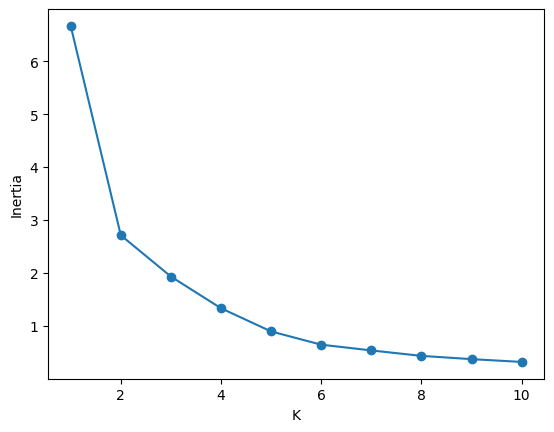

In [20]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curve using scaled dataset (gdpp vs inflation)
elbow_Kmeans(df_scaled_2)

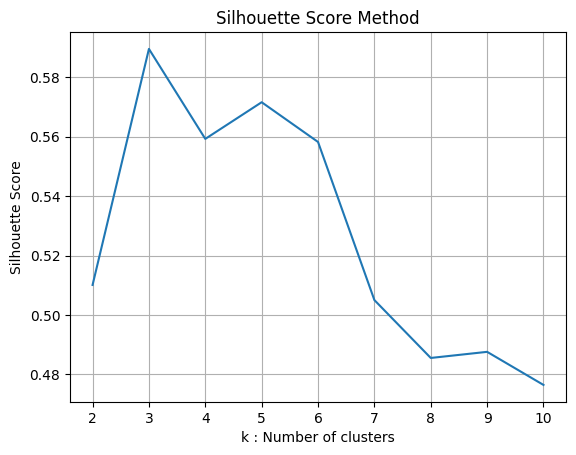

In [31]:
# Silhouette score method (gdpp vs child mortality)
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

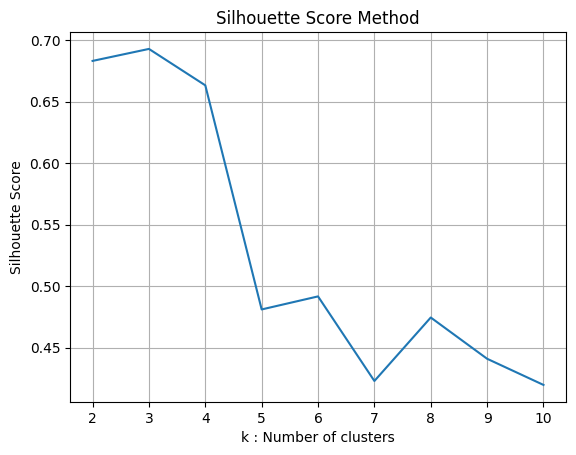

In [32]:
# Silhouette score method (gdpp vs inflation)
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled_2)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled_2, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

## Fitting a K-Means Model with the selected K value

In [23]:
# Remember to set the random_state to rseed
kmeans = KMeans(n_clusters = 3, random_state=rseed).fit(df)

df['kmean'] = kmeans.labels_

In [24]:
# Count the number of records in each cluster
df['kmean'].value_counts()

kmean
1    128
2     32
0      7
Name: count, dtype: int64

In [25]:
# Check model performance with the silhouette coefficient (gdpp vs child motality)
score = round(silhouette_score(gdpp_mort_df, kmeans.labels_, metric='euclidean'), 2)
score

0.71

In [26]:
# Check model performance with the silhouette coefficient (gdpp vs inflation)
score = round(silhouette_score(gdpp_inflation_df, kmeans.labels_, metric='euclidean'), 2)
score

0.71

## Predictions

In [27]:
# Add the predicted cluster label column to the original dataframe (gdpp vs child mortality)
df['predicted cluster'] = kmeans.fit_predict(gdpp_mort_df)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean,predicted cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


In [28]:
# Add the predicted cluster label column to the original dataframe (gdpp vs inflation)
df['predicted cluster'] = kmeans.fit_predict(gdpp_inflation_df)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean,predicted cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


## Visualisation of clusters

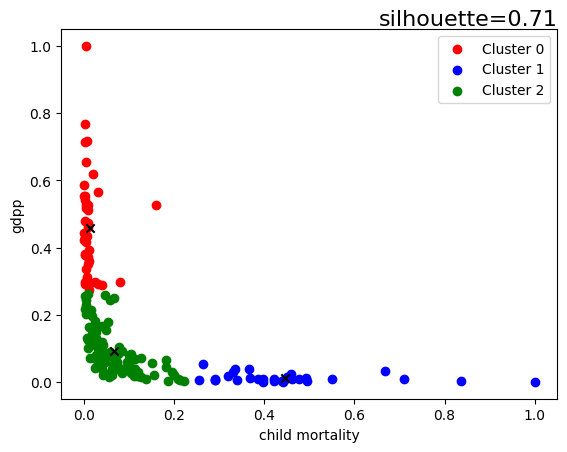

In [33]:
# Visualisation of clusters: child mortality vs gdpp
def scatter_Kmeans(x, k, r = 123):
    x = x.values.reshape(-1,2)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('child mortality')
    plt.ylabel('gdpp')
    plt.legend()
    plt.show()
    
scatter_Kmeans(gdpp_child_mortality, k = 3, r = 123)

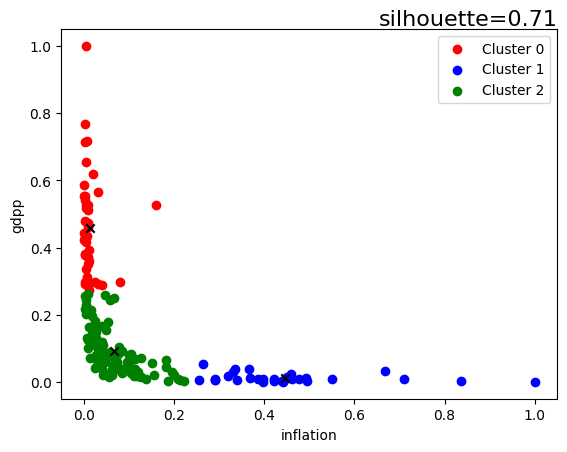

In [30]:
# Visualisation of clusters: inflation vs gdpp
def scatter_Kmeans(x, k, r = 123):
    x = x.values.reshape(-1,2)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score 
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('inflation')
    plt.ylabel('gdpp')
    plt.legend()
    plt.show()
    
scatter_Kmeans(gdpp_inflation, k = 3, r = 123)

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

I am not sure I have obtained the correct results, as I do not undrstand how I can lable the countries in the visualizations I got. Tho I think, according to my silhouette values, the distance between the clusters is very similar. 

Tho for the Visualisation of child mortality vs gdpp, the tendency shows that, high child mortality is identified with low gdpp values and vice versa, high gdpp values identify with low child mortality. 

For the Visualisation of inflation vs gdpp, the same pattern is seen, high inflation is identified with low gdpp, and low inflation is identified with high gdpp. 

With both Visualisations Cluster 2, has the highest density, represnting similarities in values of gdpp and child mortality and gpdd and inflation. 